In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import time

In [2]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
import pickle

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shafi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# GET DATA

In [4]:
# from google.colab import files
# uploaded = files.upload()

In [5]:
data = pd.read_csv('Book_data.csv')
data.head()

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [6]:
dimensions = data.shape
print("Dimensi data:", dimensions)

Dimensi data: (4657, 4)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    4657 non-null   int64 
 1   title    4657 non-null   object
 2   genre    4657 non-null   object
 3   summary  4657 non-null   object
dtypes: int64(1), object(3)
memory usage: 145.7+ KB


<Axes: >

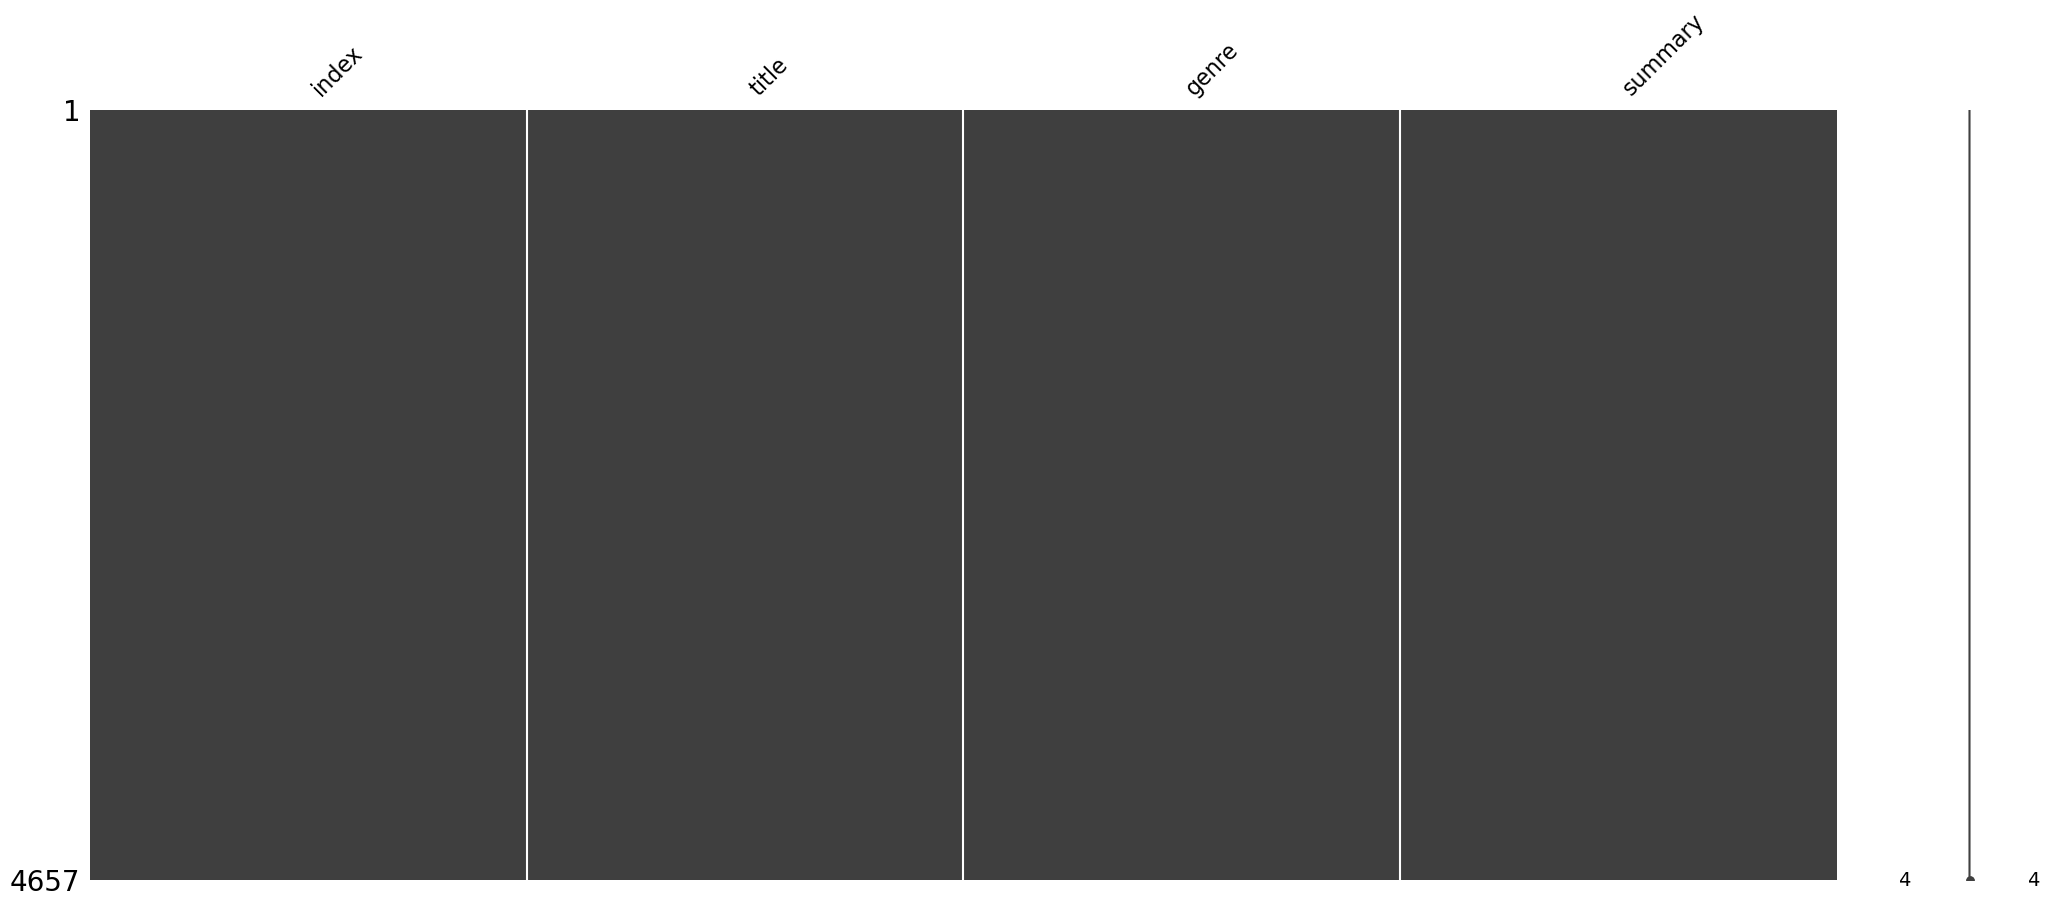

In [8]:
msno.matrix(data)

# DATA CLEANING

In [9]:
data.drop('index',inplace = True,axis = 1)
data.head()

,title,genre,summary
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shafi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shafi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
stopwords_eng = set(stopwords.words('english'))

def clean_text(input_text):
    input_text = input_text.lower()
    input_text = re.sub('[%s]' % re.escape(string.punctuation), ' ', input_text)
    text_tokens = word_tokenize(input_text)
    filtered_words = [word for word in text_tokens if word not in stopwords_eng]
    input_text = " ".join(filtered_words)
    input_text = " ".join([word for word in input_text.split() if len(word) > 3])
    input_text = re.sub(r"\s+[a-zA-Z]\s+", ' ', input_text)
    input_text = re.sub('<.*?>+', ' ', input_text)
    input_text = re.sub('\n', ' ', input_text)
    input_text = re.sub(r'\s+', ' ', input_text)

    return input_text

In [12]:
data['summary'] = data['summary'].apply(clean_text)
data['title'] = data['title'].apply(clean_text)

# EDA

In [13]:
data['genre'].value_counts()

genre
thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: count, dtype: int64

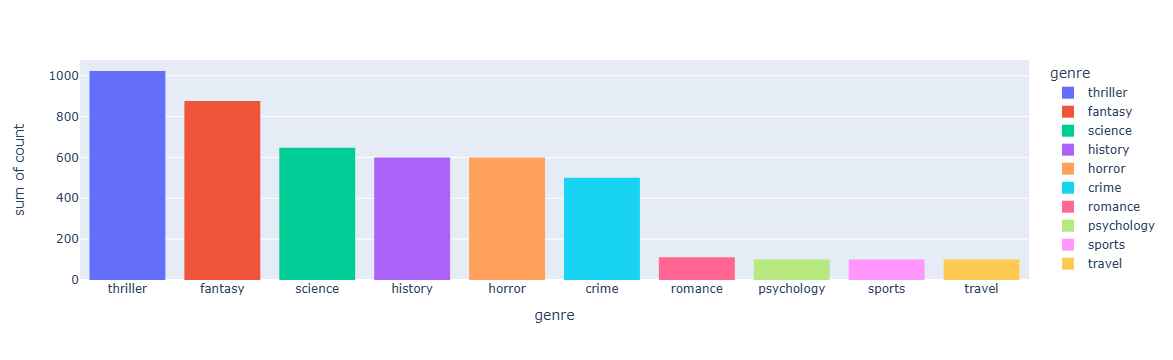

In [14]:
genre_df = pd.DataFrame({'genre':['thriller','fantasy','science','history','horror','crime','romance',
                                'psychology','sports','travel'],'count':[1023,876,647,600,600,500,111,
                                                                        100,100,100]})
fig = px.histogram(genre_df,x = 'genre',y = 'count',color = 'genre')
fig.show()

thriller


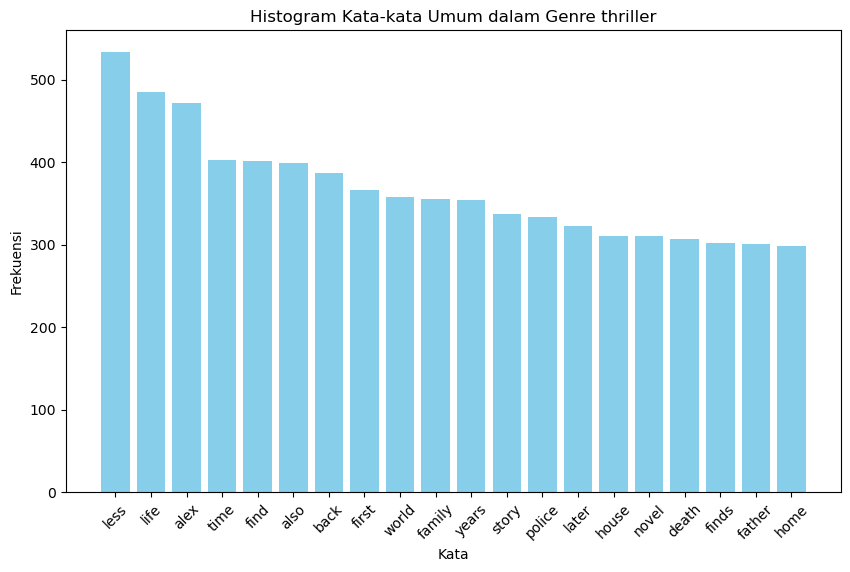

fantasy


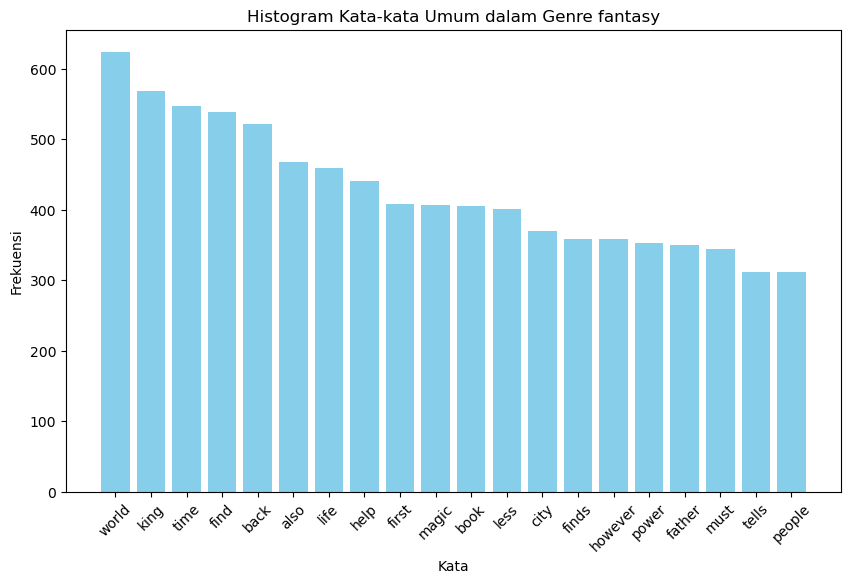

science


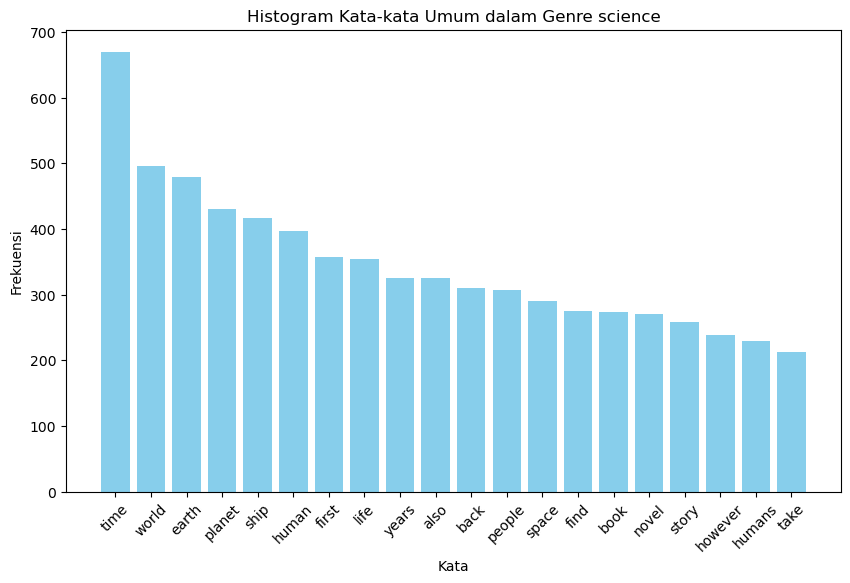

history


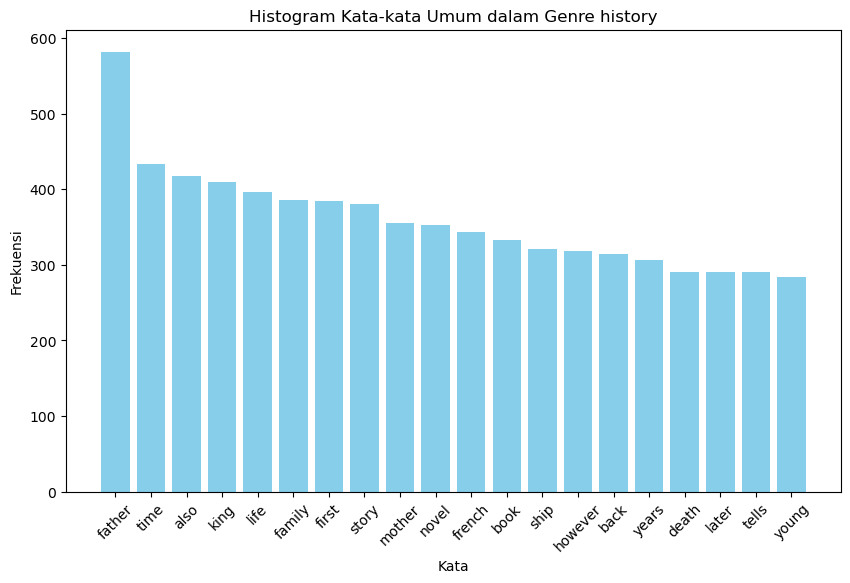

horror


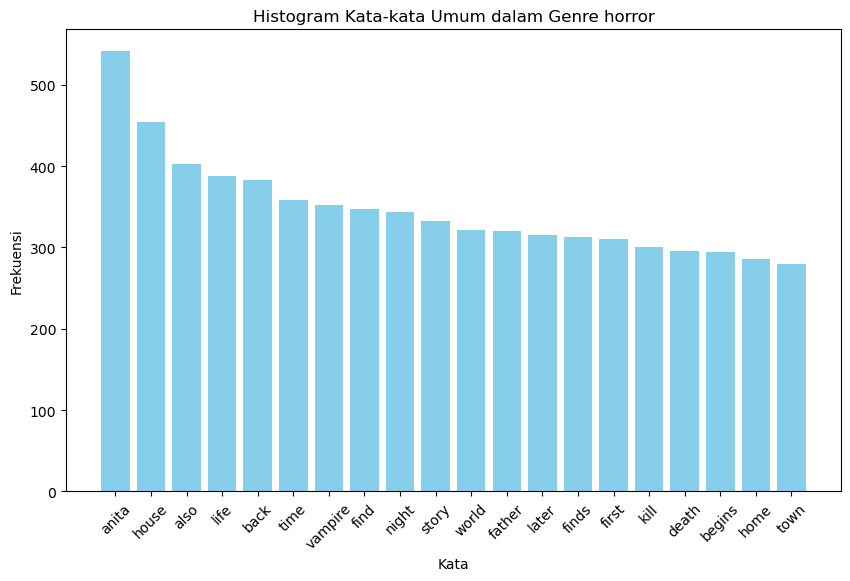

crime


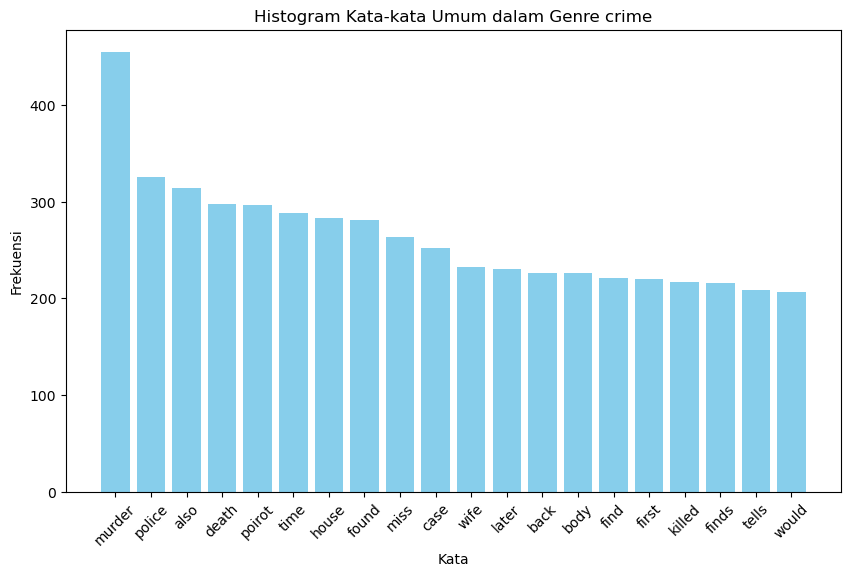

romance


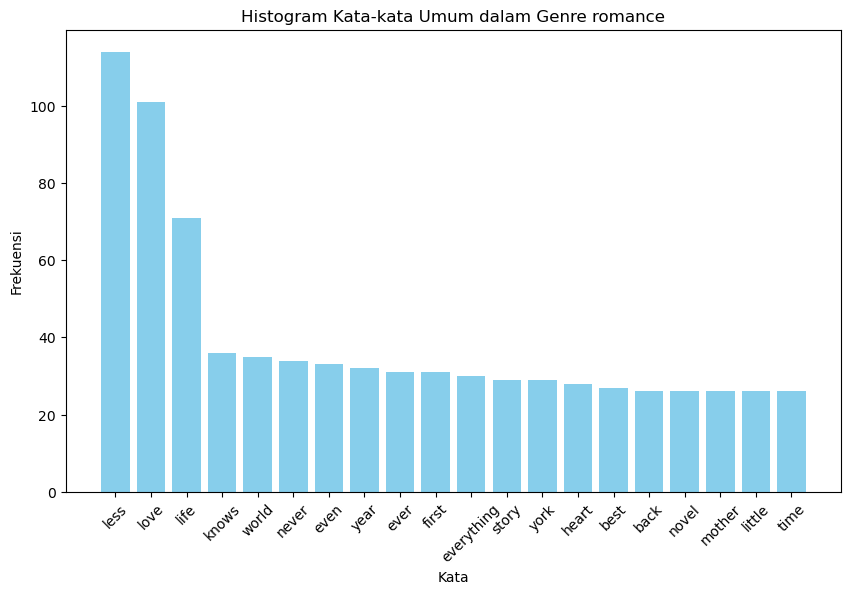

psychology


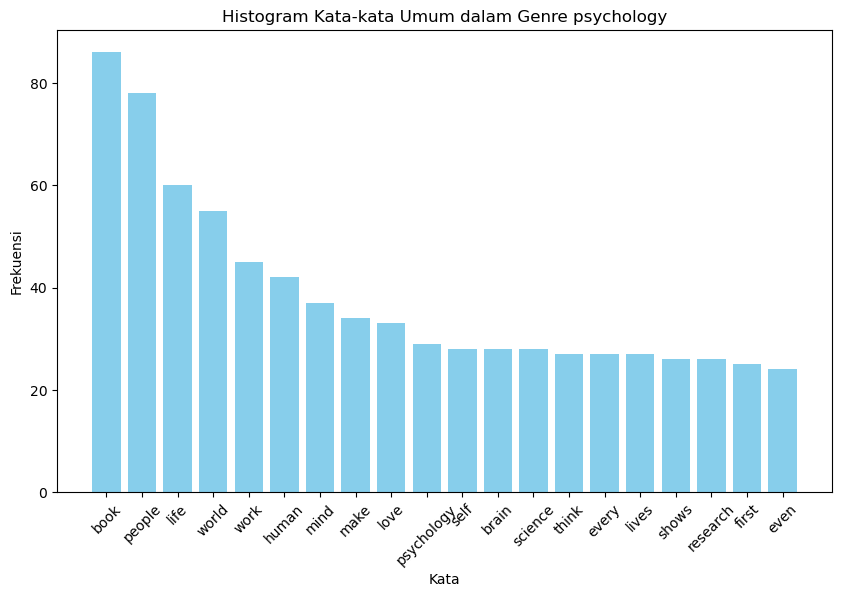

sports


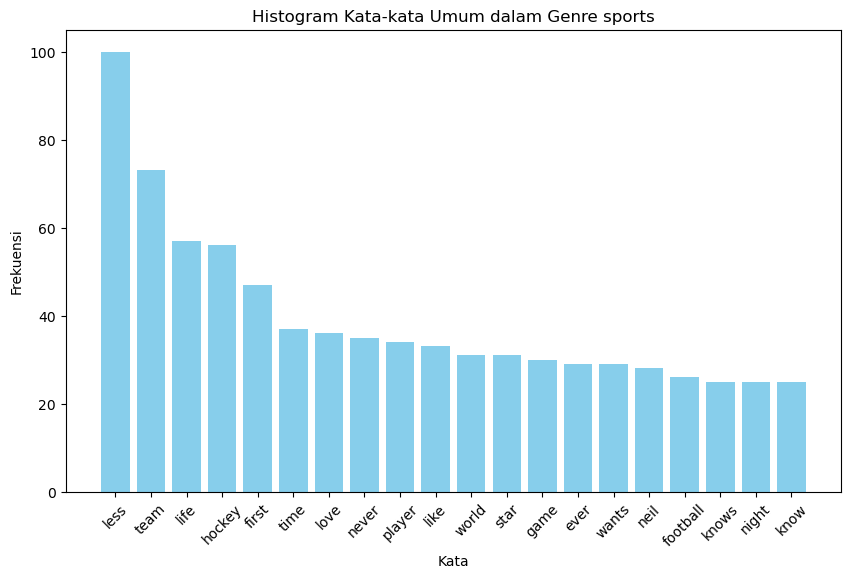

travel


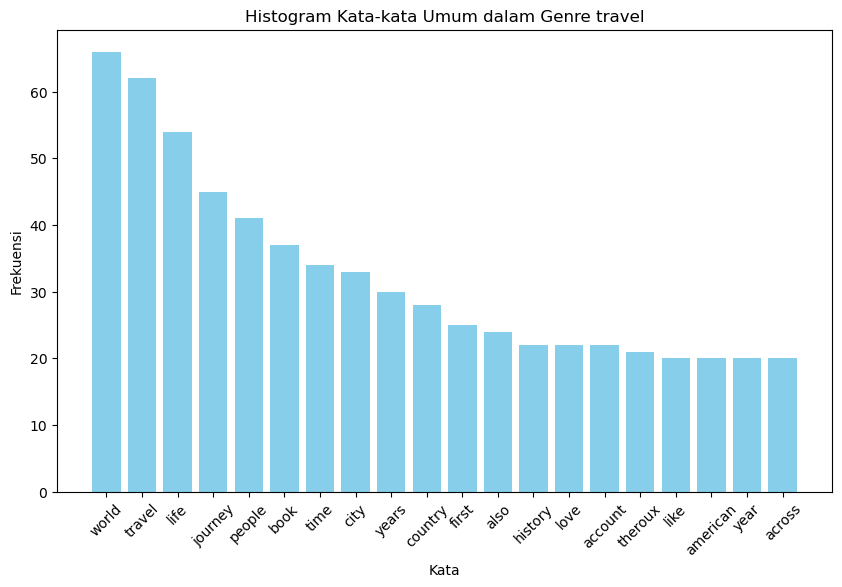

In [15]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_word_histogram(genre, summary):
    print(genre)
    words = summary.split()
    word_freq = Counter(words)
    sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
    top_words = dict(list(sorted_word_freq.items())[:20])


    plt.figure(figsize=(10, 6))
    plt.bar(top_words.keys(), top_words.values(), color='skyblue')
    plt.xlabel('Kata')
    plt.ylabel('Frekuensi')
    plt.title('Histogram Kata-kata Umum dalam Genre ' + genre)
    plt.xticks(rotation=45)
    plt.show()

def make_string(genre):
    s = ""
    for row_index, row in data.iterrows():
        if row['genre'] == genre:
            s += (row['summary'] + ' ')
    return s

genre = ['thriller', 'fantasy', 'science', 'history', 'horror', 'crime', 'romance',
         'psychology', 'sports', 'travel']

for Genre in genre:
    summary = make_string(Genre)
    plot_word_histogram(Genre, summary)


In [16]:
def data_preprocessing(text):
    tokens = word_tokenize(text)
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]
    tokens = [SnowballStemmer(language = 'english').stem(word) for word in tokens]
    return " ".join(tokens)

In [17]:
data['summary'] = data['summary'].apply(data_preprocessing)
data['title'] = data['title'].apply(data_preprocessing)
data

,title,genre,summary
0,drown wednesday,fantasy,drown wednesday first truste among morrow day ...
1,lost hero,fantasy,book open jason awaken school unabl rememb any...
2,eye overworld,fantasy,cugel easili persuad merchant fianosth attempt...
3,magic promis,fantasy,book open herald mage vanyel return countri va...
4,taran wander,fantasy,taran gurgi return caer dallben follow event t...
...,...,...,...
4652,hound,fantasy,atticus sullivan last druid life peac arizona ...
4653,charli chocol factori,fantasy,charli bucket wonder adventur begin find willi...
4654,rise,fantasy,live dream child born free say like land fathe...
4655,frostbit,fantasy,rose love dimitri dimitri might love tasha mas...


In [18]:
label_encoder = LabelEncoder()
data['genre_encode'] = label_encoder.fit_transform(data['genre'])
data

,title,genre,summary,genre_encode
0,drown wednesday,fantasy,drown wednesday first truste among morrow day ...,1
1,lost hero,fantasy,book open jason awaken school unabl rememb any...,1
2,eye overworld,fantasy,cugel easili persuad merchant fianosth attempt...,1
3,magic promis,fantasy,book open herald mage vanyel return countri va...,1
4,taran wander,fantasy,taran gurgi return caer dallben follow event t...,1
...,...,...,...,...
4652,hound,fantasy,atticus sullivan last druid life peac arizona ...,1
4653,charli chocol factori,fantasy,charli bucket wonder adventur begin find willi...,1
4654,rise,fantasy,live dream child born free say like land fathe...,1
4655,frostbit,fantasy,rose love dimitri dimitri might love tasha mas...,1


In [20]:
data['genre_original'] = label_encoder.inverse_transform(data['genre_encode'])
data

,title,genre,summary,genre_encode,genre_original
0,drown wednesday,fantasy,drown wednesday first truste among morrow day ...,1,fantasy
1,lost hero,fantasy,book open jason awaken school unabl rememb any...,1,fantasy
2,eye overworld,fantasy,cugel easili persuad merchant fianosth attempt...,1,fantasy
3,magic promis,fantasy,book open herald mage vanyel return countri va...,1,fantasy
4,taran wander,fantasy,taran gurgi return caer dallben follow event t...,1,fantasy
...,...,...,...,...,...
4652,hound,fantasy,atticus sullivan last druid life peac arizona ...,1,fantasy
4653,charli chocol factori,fantasy,charli bucket wonder adventur begin find willi...,1,fantasy
4654,rise,fantasy,live dream child born free say like land fathe...,1,fantasy
4655,frostbit,fantasy,rose love dimitri dimitri might love tasha mas...,1,fantasy


In [21]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['summary'])
y = data['genre']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
models = [LogisticRegression(),
          RandomForestClassifier(),
          GradientBoostingClassifier(),
          KNeighborsClassifier(),
         ]

In [26]:
Name = []
Accuracy = []
Precision = []
F1_Score = []
Recall = []
Time_Taken = []
for model in models:
    name = type(model).__name__
    Name.append(name)
    model = OneVsRestClassifier(model)
    begin = time.time()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    end = time.time()
    Accuracy.append(accuracy_score(prediction,y_test))
    Precision.append(precision_score(prediction,y_test,average = 'macro'))
    Recall.append(recall_score(prediction,y_test,average = 'macro'))
    F1_Score.append(f1_score(prediction,y_test,average = 'macro'))
    Time_Taken.append(end-begin)
    print(name + ' Successfully Trained')

LogisticRegression Successfully Trained
RandomForestClassifier Successfully Trained
GradientBoostingClassifier Successfully Trained
KNeighborsClassifier Successfully Trained


In [27]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Precision_score':Precision,'Recall_score':Recall,
        'F1_score':F1_Score,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Precision_score,Recall_score,F1_score,Time Taken
0,LogisticRegression,0.673820,0.588308,0.703095,0.626919,4.430538
1,RandomForestClassifier,0.627682,0.452632,0.657989,0.475932,242.756517
2,GradientBoostingClassifier,0.606223,0.479304,0.565226,0.500886,450.158011
3,KNeighborsClassifier,0.276824,0.191660,0.388315,0.193251,4.005318


In [28]:
best_model_index = model_df['Accuracy'].idxmax()
best_model = model_df.loc[best_model_index]

In [29]:
print("\nBest Model:")
print(best_model)


Best Model:
Name               LogisticRegression
Accuracy                      0.67382
Precision_score              0.588308
Recall_score                 0.703095
F1_score                     0.626919
Time Taken                   4.430538
Name: 0, dtype: object


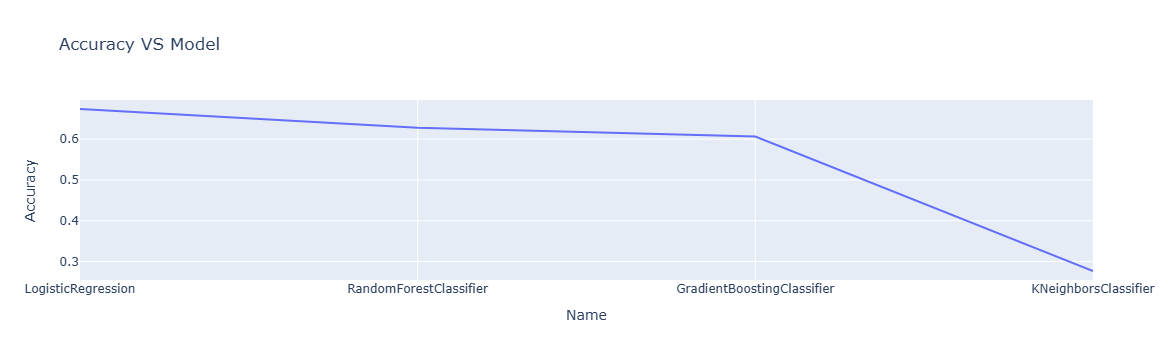

In [30]:
model_df.sort_values(by = 'Accuracy',ascending = False,inplace = True)
fig = px.line(model_df, x="Name", y="Accuracy", title='Accuracy VS Model')
fig.show()

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
with open ("vectorizer.pkl", 'wb') as file:
    pickle.dump(vectorizer, file)

In [33]:
with open("label_encoder.pkl", 'wb') as file:
    pickle.dump(label_encoder, file)

In [34]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

file_name = "LogicRegression_model.pkl"
with open(file_name, 'wb') as file:
    pickle.dump(model, file)
print("Model Saved as", file_name)

Model Saved as LogicRegression_model.pkl
